# GOOGL stock 'Close' value prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM

Using TensorFlow backend.


In [2]:


def load_data(stock, seq_len):
    amount_of_features = len(stock.columns)
    data = stock.as_matrix() #pd.DataFrame(stock)
    
    resultpctg=data[:,1]
    resultpctg[1:]=(np.diff(resultpctg) / resultpctg[:-1]) * 100.
    resultpctg[0]=0
    
    data = sci_minmax(data)
    classific_normaliz(resultpctg)
    
    data[:,1]=resultpctg#restauro porcentages
    #xminimr= resultpctg.min(axis=0)
    #xmaximr= resultpctg.max(axis=0)
    #print("maxxminn")
    #print(xminimr)
    #print(xmaximr)#viewing graph, normalize to 0,5 and -0,5
    
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    
    result = np.array(result)#results solo cada secuencia
    #print(result.shape)
    row = round(0.9 * result.shape[0])#90% train
    train = result[:int(row), :]
    x_train = train[:, :-1]#tos los casos pero el 20avo no
    print(train[:, :-1])
    print(train[:, :-1].shape)
    print("xxxxxxx")
    print(train[:, -1])
    print(train[:, -1].shape)
    print("yyyyyyyyyyyyyyyy")
    print(train[:, -1][:,1])
    print(train[:, -1][:,1].shape)
    y_train = train[:, -1][:,1]#el 20avo es la respuesta,y el valor dl stock el 1
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1][:,1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]


In [3]:
#normalization
#min max scaler normalization
def numpy_minmax(X):#customizada el maximo
    xmin =  X.min(axis=0)
    resultnorm=(X - xmin) / (X.max(axis=0) - xmin)
    return resultnorm
    #return (X - xmin) / (X.max(axis=0) - xmin)
def normalizeinput(Xmin,Xmax,inptest):#customizada el maximo
    #inptest[inptest>Xmax]=1#esta bien¿?
    #inptest[inptest<Xmin]=0#esta bien¿?
    resultnorm=(inptest - Xmin) / (Xmax - Xmin)
    return resultnorm
    #return (X - xmin) / (X.max(axis=0) - xmin)
def sci_minmax(X):#separa por columnas la normalizacion
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True)
    return minmax_scale.fit_transform(X)
def normaliz_labels(X):
    tamano=X.shape[0]
    for e in xrange(0,tamano):
        if(X[e]<minResultLabel):
            X[e]=minResultLabel
        if(X[e]>maxResultLabel):
            X[e]=maxResultLabel
    return (X/maxResultLabel)

def classific_normaliz(X):
    tamano=X.shape[0]
    for e in xrange(0,tamano):
        if(X[e]>0.65):#2.84,3.69
            X[e]=0.65
        elif(X[e]<-0.65):
            X[e]=-0.65
    return (X)

def labeltodimensions(labeling):
    sizel=labeling.shape[0]
    resultl=np.zeros([sizel,sizelabels])
    g1=0
    g2=0
    g3=0
    g4=0
    for i in range (0,sizel):
        if(labeling[i]==1):
            g1=g1+1
            resultl[i,0]=1
        elif(labeling[i]==-1):
            g2=g2+1
            resultl[i,2]=1
        #elif(labeling[i]==2):
        #    g3=g3+1
        #    resultl[i,0]=0.5
        else:#3clases
            g4=g4+1
            resultl[i,1]=1
    print("grupos %f %f %f %f" % (g1,g2,g3,g4))
    return resultl

In [4]:
df = pd.read_csv('allm5.csv')#, names=['fecha','idtienda','idproducto','ventas']
print(df.shape)
#df[['Fecha','Ventas']].set_index('Fecha').plot()
#df.ix[1111:1112,0:76]

#Remove inalterable columns

cgot=[]

for i in range (0,df.shape[1]):
    if(df[str(df.columns[i])].unique().size!=1 and str(df.columns[i])!="symbol"):
        cgot.append(str(df.columns[i]))

date_splita = df['datetime'].str.split(' ').str[0]
df['datetime']=date_splita
date_split = df['datetime'].str.split('-').str
df['Year'], df['Month'], df['Day'] = date_split
resultdays = [int(i) for i in df['Day']]
df['datetime']=resultdays
xinputs=df.ix[:,cgot]

#print(cgot)

xinputsm=xinputs.as_matrix()
xminim= xinputsm.min(axis=0)
xmaxim= xinputsm.max(axis=0)
print(xminim[1])
print(xmaxim[1])
#Initializing parameters
window = 24#26
sizefeatures = len(xinputs.columns)

#print(xinputs[1:5])



X_train, y_train, X_test, y_test = load_data(xinputs, window)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)
#print(X_train[0])
#print(y_train[0])
print(y_train.min(axis=0))
print(y_test.min(axis=0))
print(y_train.max(axis=0))
print(y_test.max(axis=0))
#window will be 26, 3 parts

(73305, 155)
0.53742
0.68134
[[[ 0.          0.          0.         ...,  0.90909091  1.          0.        ]
  [ 0.          0.0688829   0.         ...,  0.90909091  0.88889
    0.98091043]
  [ 0.          0.02693562  0.         ...,  0.90909091  0.5         0.98091043]
  ..., 
  [ 0.          0.00897022  0.57009    ...,  0.91608392  0.86667
    0.98237885]
  [ 0.          0.02840315  0.54256    ...,  0.91608392  0.40741
    0.98237885]
  [ 0.         -0.01793373  0.59434    ...,  0.91608392  0.14286
    0.98237885]]

 [[ 0.          0.0688829   0.         ...,  0.90909091  0.88889
    0.98091043]
  [ 0.          0.02693562  0.         ...,  0.90909091  0.5         0.98091043]
  [ 0.         -0.01795225  1.         ...,  0.90909091  0.86486
    0.98091043]
  ..., 
  [ 0.          0.02840315  0.54256    ...,  0.91608392  0.40741
    0.98237885]
  [ 0.         -0.01793373  0.59434    ...,  0.91608392  0.14286
    0.98237885]
  [ 0.         -0.02242119  0.66397    ...,  0.91608392  0.026

In [5]:
#Building models

def build_model(layers):
    #0.0017val test 
    d = 0.2
    model = Sequential()
    model.add(LSTM(228, input_shape=(layers[1], layers[0]), return_sequences=True))
    model.add(Dropout(d))
    model.add(LSTM(164, input_shape=(layers[1], layers[0]), return_sequences=True))
    model.add(Dropout(d))
    model.add(LSTM(64, input_shape=(layers[1], layers[0]), return_sequences=False))
    model.add(Dense(16,init='uniform',activation='relu'))        
    model.add(Dense(1,init='uniform',activation='linear'))
    model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
    return model

def build_model2(layers):
        #0.0015VAL #0.0077
        d = 0.2
        model = Sequential()
        model.add(LSTM(128, input_shape=(layers[1], layers[0]), return_sequences=True))
        model.add(Dropout(d))
        model.add(LSTM(64, input_shape=(layers[1], layers[0]), return_sequences=False))
        model.add(Dropout(d))
        model.add(Dense(16,init='uniform',activation='relu'))        
        model.add(Dense(1,init='uniform',activation='linear'))
        model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
        return model


def build_model4(layers):
        #0.0015VAL
        d = 0.2
        model = Sequential()
        model.add(LSTM(603, input_shape=(layers[1], layers[0]), return_sequences=True))
        model.add(Dropout(d))
        model.add(LSTM(300, input_shape=(layers[1], layers[0]), return_sequences=True))
        model.add(Dropout(d))
        model.add(LSTM(128, input_shape=(layers[1], layers[0]), return_sequences=False))
        model.add(Dropout(d))
        model.add(LSTM(64, input_shape=(layers[1], layers[0]), return_sequences=False))
        model.add(Dropout(d))
        model.add(Dense(16,init='uniform',activation='relu'))        
        model.add(Dense(1,init='uniform',activation='linear'))
        model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
        return model

def build_model3(layers):
    #0.0011VAL test 0.0038
    d = 0.2
    model = Sequential()
    model.add(LSTM(228, input_shape=(layers[1], layers[0]), return_sequences=True))
    model.add(Dropout(d))
    model.add(LSTM(164, input_shape=(layers[1], layers[0]), return_sequences=False))
    model.add(Dropout(d))
    model.add(Dense(64,init='uniform',activation='relu'))        
    model.add(Dense(26,init='uniform',activation='relu'))        
    model.add(Dense(1,init='uniform',activation='linear'))
    model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
    return model


In [6]:
#model = build_model2([sizefeatures,window,1])
#model = build_model2([sizefeatures,window,1])
model = build_model3([sizefeatures,window,1])

In [7]:
model.fit(
    X_train,
    y_train,
    batch_size=1512,
    nb_epoch=500,
    validation_split=0.15,
    verbose=1)

Train on 56057 samples, validate on 9893 samples
Epoch 1/500
56057/56057 [==============================] - 14s - loss: 0.0013 - acc: 0.0267 - val_loss: 8.8018e-04 - val_acc: 0.0268

In [8]:
#trainScore = model.evaluate(X_train, y_train, verbose=0)
#print('Train Score: %f MSE (%f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %f MSE (%f RMSE)' % (testScore[0], math.sqrt(testScore[0])))

Test Score: 0.001962 MSE (0.044289 RMSE)


In [9]:
# print(X_test[-1])
diff=[]
ratio=[]
p = model.predict(X_test)
for u in range(len(y_test)):
    pr = p[u][0]
    ratio.append((y_test[u]/pr)-1)
    diff.append(abs(y_test[u]- pr))
    #print(u, y_test[u], pr, (y_test[u]/pr)-1, abs(y_test[u]- pr))

## Predictions vs Real results

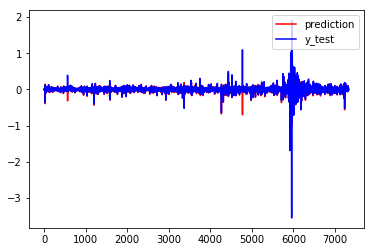

In [10]:
import matplotlib.pyplot as plt2

plt2.plot(p,color='red', label='prediction')
plt2.plot(y_test,color='blue', label='y_test')
plt2.legend(loc='upper right')
plt2.show()

In [11]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 


Saved model to disk


In [14]:
# later...
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %f%%" % (loaded_model.metrics_names[1], score[1]*100))


testScore = loaded_model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %f MSE (%f RMSE)' % (testScore[0], math.sqrt(testScore[0])))

Loaded model from disk
acc: 2.306223%
Test Score: 0.214302 MSE (0.462927 RMSE)


In [15]:
# print(X_test[-1])
diff=[]
ratio=[]
p = loaded_model.predict(X_test)
for u in range(len(y_test)):
    pr = p[u][0]
    ratio.append((y_test[u]/pr)-1)
    diff.append(abs(y_test[u]- pr))
    #print(u, y_test[u], pr, (y_test[u]/pr)-1, abs(y_test[u]- pr))

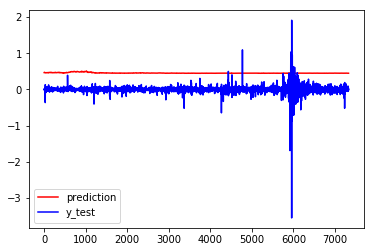

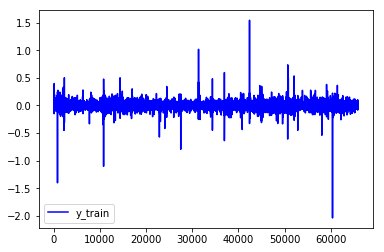

In [16]:
import matplotlib.pyplot as plt2

plt2.plot(p,color='red', label='prediction')
plt2.plot(y_test,color='blue', label='y_test')
plt2.legend(loc='lower left')
plt2.show()

plt2.plot(y_train,color='blue', label='y_train')
plt2.legend(loc='lower left')
plt2.show()